In [204]:
import json
import pandas as pd
import numpy as np
from skimage.io import imread
from PIL import Image
import cv2
import os

In [2]:
 # loading results
with open('50_set/result.json') as f:
    data_50 = json.load(f)

with open('60_annotated/result.json') as res:
    data_60 = json.load(res)

In [3]:
def get_dataframe(annotation_results):
    image_data = pd.DataFrame(annotation_results['images'])
    annotation_data = pd.DataFrame(annotation_results['annotations'])
    return image_data, annotation_data

In [4]:
image_data_50, annotation_data_50 = get_dataframe(data_50)
image_data_60, annotation_data_60 = get_dataframe(data_60)

In [5]:
annotation_data_50.head()

,id,image_id,category_id,segmentation,bbox,ignore,iscrowd,area
0,0,0,0,"[[312.0, 611.9999999999999, 323.0, 493.9999999...","[48.0, 126.99999999999999, 283.0, 484.99999999...",0,0,97232.500000
1,1,0,0,"[[414.0, 86.00000000000001, 404.00000000000006...","[377.0, 57.99999999999999, 348.0000000000001, ...",0,0,159488.500000
2,2,1,0,"[[180.49200000000002, 792.1218543046358, 302.2...","[3.204, 21.350993377483448, 698.472, 770.77086...",0,0,252349.000593
3,3,1,0,"[[651.4799999999999, 413.14172185430465, 731.5...","[446.42400000000004, 413.14172185430465, 353.5...",0,0,73381.316678
4,4,1,0,"[[70.48799999999997, 269.0225165562914, 107.86...","[1.068, 4.27019867549669, 344.9640000000001, 3...",0,0,50988.907248


array([0])

In [6]:
image_data_50.head(5)

,width,height,id,file_name
0,731,676,0,images/2/c7289a66-34.png
1,801,806,1,images/2/d28b0caf-33.png
2,1213,930,2,images/2/fb63decd-32.png
3,904,754,3,images/2/c48c0ac3-31.png
4,1313,894,4,images/2/bd63eba1-30.png


In [7]:
merge_data_50 = pd.merge(annotation_data_50, image_data_50, how='left', left_on = 'image_id', right_on='id').dropna()
print(image_data_50.shape[0], '+', annotation_data_50.shape[0], '->', merge_data_50.shape[0])
merge_data_50.head(10)

50 + 705 -> 705


,id_x,image_id,category_id,segmentation,bbox,ignore,iscrowd,area,width,height,id_y,file_name
0,0,0,0,"[[312.0, 611.9999999999999, 323.0, 493.9999999...","[48.0, 126.99999999999999, 283.0, 484.99999999...",0,0,97232.500000,731,676,0,images/2/c7289a66-34.png
1,1,0,0,"[[414.0, 86.00000000000001, 404.00000000000006...","[377.0, 57.99999999999999, 348.0000000000001, ...",0,0,159488.500000,731,676,0,images/2/c7289a66-34.png
2,2,1,0,"[[180.49200000000002, 792.1218543046358, 302.2...","[3.204, 21.350993377483448, 698.472, 770.77086...",0,0,252349.000593,801,806,1,images/2/d28b0caf-33.png
3,3,1,0,"[[651.4799999999999, 413.14172185430465, 731.5...","[446.42400000000004, 413.14172185430465, 353.5...",0,0,73381.316678,801,806,1,images/2/d28b0caf-33.png
4,4,1,0,"[[70.48799999999997, 269.0225165562914, 107.86...","[1.068, 4.27019867549669, 344.9640000000001, 3...",0,0,50988.907248,801,806,1,images/2/d28b0caf-33.png
5,5,2,0,"[[1182.2706666666668, 355.82608695652175, 198....","[1.6173333333333333, 64.69565217391305, 1208.1...",0,0,411388.591374,1213,930,2,images/2/fb63decd-32.png
6,6,2,0,"[[879.8293333333332, 666.3652173913043, 936.43...","[879.8293333333332, 558.0, 329.93600000000004,...",0,0,47424.249635,1213,930,2,images/2/fb63decd-32.png
7,7,3,0,"[[278.432, 563.6932907348244, 537.578666666666...","[14.464, 498.65175718849844, 530.3466666666666...",0,0,77149.639736,904,754,3,images/2/c48c0ac3-31.png
8,8,3,0,"[[126.56000000000002, 90.33546325878595, 190.4...","[0.0, 90.33546325878595, 364.0106666666667, 30...",0,0,56254.008026,904,754,3,images/2/c48c0ac3-31.png
9,9,3,0,"[[288.07466666666664, 116.83386581469648, 306....","[288.07466666666664, 71.06389776357828, 184.41...",0,0,11503.994002,904,754,3,images/2/c48c0ac3-31.png


In [9]:
# reset filename
def reset_image_path(filename):
    return filename.split('/')[2]
merge_data_50['file_name'] = merge_data_50['file_name'].apply(reset_image_path)

In [101]:
# image data
image_data_50['file_name'] = image_data_50['file_name'].apply(reset_image_path)

## From updated files

In [205]:
import json
import pandas as pd
import numpy as np
from skimage.io import imread
import cv2
import os

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt


## Libraries -torch
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

In [ ]:
image_dir = '50_set/images'
target_directory = 'processed/images'


from annotation_preproc import updateAnnotations

new_data = updateAnnotations(
                            image_directory=image_dir,
                            target_image_directory=target_directory,
                            annotation_data=merge_data_50, 
                            )

In [91]:
image_directory_50 = '/Users/sugar/Documents/baamtu_files/annotations/annonated/processed/images'
new_data['id_x'] = merge_data_50.id_x.values
new_data.head(5)

,image_id,fileName,segmentation,bbox,width,height,id_x
0,0,c7289a66-34.png,"[[128.0437756497948, 271.5976331360946, 132.55...","[20, 56, 116, 215]",300,300,0
1,0,c7289a66-34.png,"[[169.90424076607388, 38.16568047337279, 165.8...","[155, 26, 143, 257]",300,300,1
2,1,d28b0caf-33.png,"[[67.60000000000001, 294.83443708609275, 113.2...","[1, 8, 262, 287]",300,300,2
3,1,d28b0caf-33.png,"[[243.99999999999997, 153.7748344370861, 274.0...","[167, 154, 132, 141]",300,300,3
4,1,d28b0caf-33.png,"[[26.39999999999999, 100.13245033112584, 40.4,...","[0, 2, 129, 116]",300,300,4


In [92]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      705 non-null    int64 
 1   fileName      705 non-null    object
 2   segmentation  705 non-null    object
 3   bbox          705 non-null    object
 4   width         705 non-null    int64 
 5   height        705 non-null    int64 
 6   id_x          705 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 38.7+ KB


In [30]:
def create_boxes(in_rows):
    box_list = []
    for _, in_row in in_rows.iterrows():
        (start_y, start_x, wid_y, wid_x) = in_row['bbox']
        
        box_list += [Rectangle((start_x, start_y), 
                         wid_y , wid_x
                         )]
    return box_list

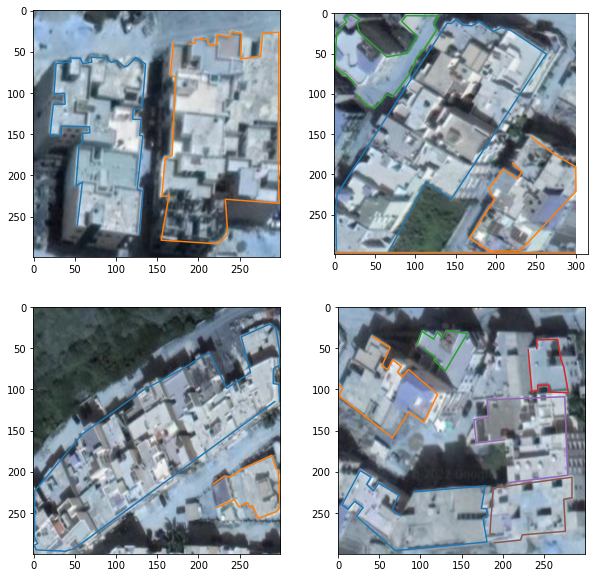

In [96]:
fig, m_axs = plt.subplots(2, 2, figsize = (10, 10))
for c_ax, (c_id, c_df) in zip(m_axs.flatten(), new_data.groupby('image_id')):
    img_data = imread(os.path.join(image_directory_50, c_df['fileName'].values[0]))
    c_ax.imshow(img_data)
    for _, c_row in c_df.iterrows():
        xy_vec = np.array(c_row['segmentation']).reshape((-1, 2))
        c_ax.plot(xy_vec[:, 0], xy_vec[:, 1], label = c_df['id_x'])

- Converting polygons into semantic segmentation

In [97]:
from matplotlib.path import Path
from skimage.color import label2rgb


def rows_to_segmentation(in_img, in_df):
    xx, yy = np.meshgrid(range(in_img.shape[0]), 
                range(in_img.shape[1]),
               indexing='ij')
    out_img = np.zeros(in_img.shape[:2])
    for _, c_row in in_df.iterrows():
        xy_vec = np.array(c_row['segmentation']).reshape((-1, 2))
        c_ax.plot(xy_vec[:, 0], xy_vec[:, 1], label = c_df['id_x'])
        xy_path = Path(xy_vec)
        out_img += xy_path.contains_points(np.stack([yy.ravel(), 
                                                     xx.ravel()], -1)).reshape(out_img.shape)
    return out_img

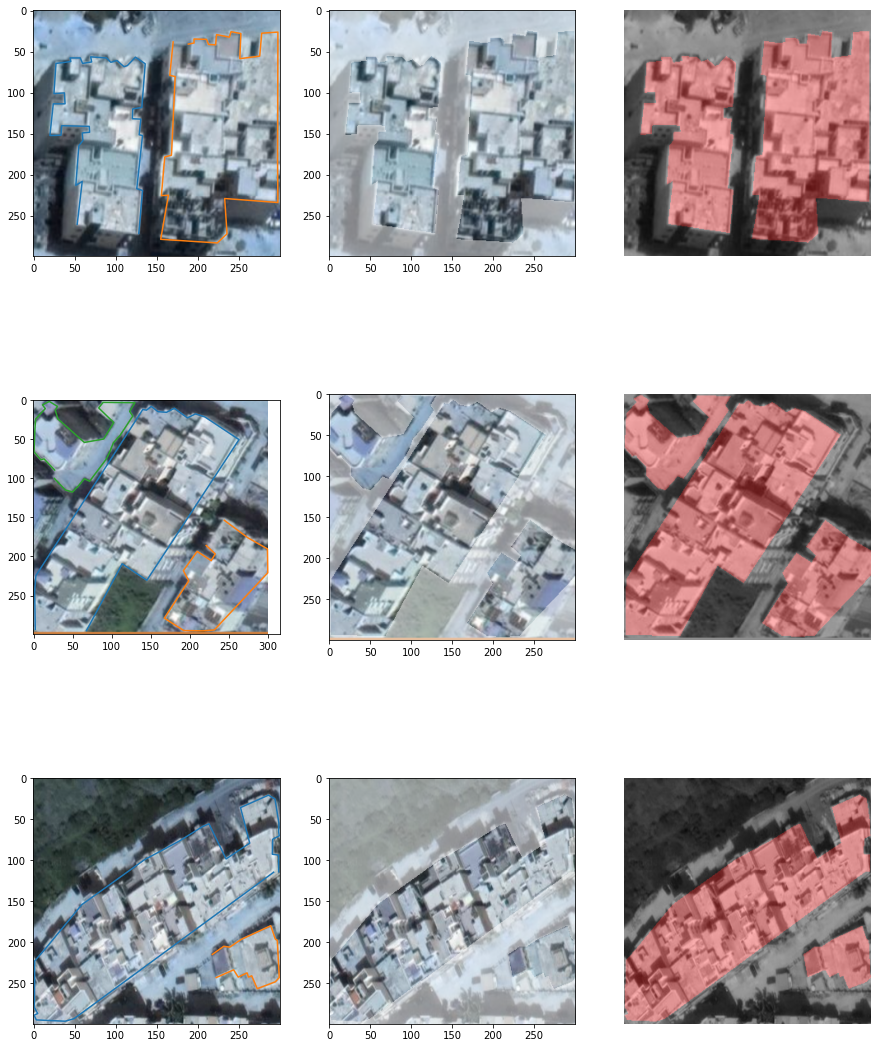

In [100]:
fig, m_axs = plt.subplots(3, 3, figsize = (15, 20))
for (c_ax, d_ax, f_ax), (c_id, c_df) in zip(m_axs,
                                      new_data.groupby('image_id')):
    img_data = imread(os.path.join(image_directory_50, c_df['fileName'].values[0]))
    c_ax.imshow(img_data)
    out_img = rows_to_segmentation(img_data, c_df)
    rgba_img = np.concatenate([img_data, 
                               np.clip(np.expand_dims(127*out_img+127, -1), 0, 255).astype(np.uint8)
                              ], -1)
    rgba_img = rgba_img[:, :, :4]
    d_ax.imshow(rgba_img)
    
    f_ax.imshow(label2rgb(image=img_data, label=out_img, bg_label = 0))
    f_ax.axis("off")

### splitting data for train

In [292]:
new_data['image_id'].nunique()

50

In [294]:
from sklearn.model_selection import train_test_split
train_ids, valid_ids = train_test_split(image_data_50['id'], test_size = 0.10, random_state=42)
train_ids = train_ids.reset_index(drop=True)
valid_ids = valid_ids.reset_index(drop=True)
print(train_ids.shape[0], 'training images')
print(valid_ids.shape[0], 'validation images')

45 training images
5 validation images


In [297]:
# custom mask class using COCO
from pycocotools.coco import COCO

class customMask(COCO):
    def __init__(self, imgs):
        self.imgs = imgs
        self.imgs = [imgs.loc[i] for i in range(len(imgs))]

# instantiate the class image data info
img_df = image_data_50.copy()
img_df['width'] = 300
img_df['height'] = 300
coco = customMask(imgs=img_df)

# annotation data
annotation_data = new_data.copy()
annotation_data['category_id'] = 0

## some data setting
category_ids = [0]
image_directory = '/Users/sugar/Documents/baamtu_files/annotations/annonated/processed/images'
image_data = [img_df.copy().loc[i] for i in range(len(img_df))]




In [298]:
def get_mask(coco, img_id, cat_ids, annot_df):
    
    img_shape = (300, 300, 1)

    ann_ids = annot_df[annot_df['image_id'] == img_id].copy().reset_index(drop = True)

    anns = [ann_ids.loc[i] for i in range(len(ann_ids))]


    masks = np.zeros(img_shape)
    for idx, cat_id in enumerate(cat_ids):
        mask = np.zeros(img_shape[:2])
        for ann in anns:
            if cat_id == ann['category_id']:
                mask = np.maximum(mask, coco.annToMask(ann))
        masks[:, :, idx] = mask
    return masks

In [299]:
class segmentationDataset(Dataset):
    def __init__(self, root_dir, 
                        img_ids, 
                        cat_ids, 
                        coco_api, 
                        img_df,
                        annot_df,
                        transforms=None, 
                        preprocessing=None):
        
        self.root_dir = root_dir
        self.img_ids = img_ids
        self.cat_ids = cat_ids
        self.coco_api = coco_api
        self.transforms = transforms
        self.preprocessing = preprocessing
        self.img_df = img_df
        self.annot_df = annot_df
    
    def __getitem__(self, idx):
        img_id = self.img_ids[idx] # get image idx
        img_inf = self.img_df[img_id] # load image info
        
        file_name = img_inf['file_name'] # get the image file name
        file_path = f'{self.root_dir}/{file_name}'
        img = Image.open(file_path).convert('RGB')
        mask = get_mask(self.coco_api, img_id, self.cat_ids, self.annot_df)

        if self.transforms:
            augmented = self.transforms(image=np.array(img), mask=mask)
            img = augmented['image']
            mask = augmented['mask']

        if self.preprocessing:
            augmented = self.preprocessing(image=img, mask=mask)
            img = augmented['image']
            mask = augmented['mask']

        return img, mask
    
    def __len__(self):
        return len(self.img_ids)

In [300]:
exampleData = segmentationDataset(
                        root_dir=image_directory,
                        img_ids=train_ids,
                        cat_ids=category_ids,
                        coco_api=coco,
                        img_df=image_data,
                        annot_df=annotation_data,
                        )

exampleValidData = segmentationDataset(
                        root_dir=image_directory,
                        img_ids=valid_ids,
                        cat_ids=category_ids,
                        coco_api=coco,
                        img_df=image_data,
                        annot_df=annotation_data,
                        )


In [301]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

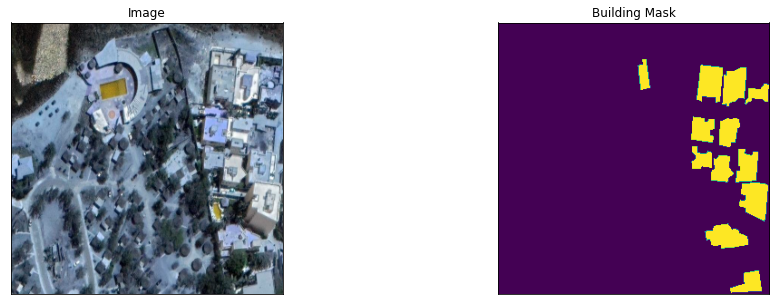

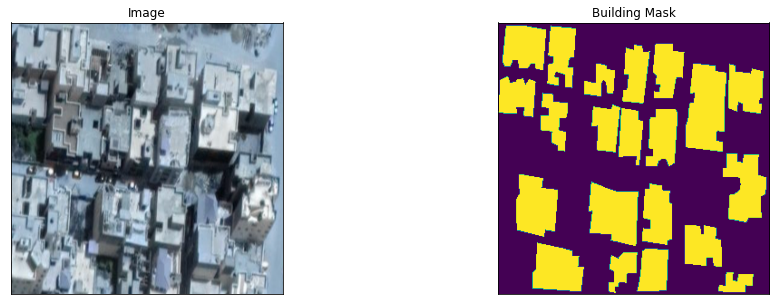

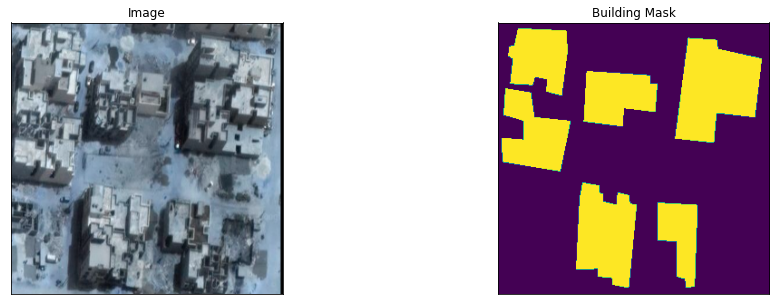

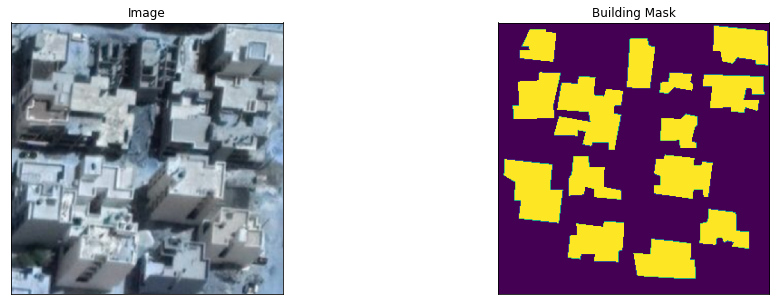

In [302]:
for i in range(4):
    image, mask = exampleData[i]
    visualize(
    image=image, 
    building_mask=mask.squeeze(),)


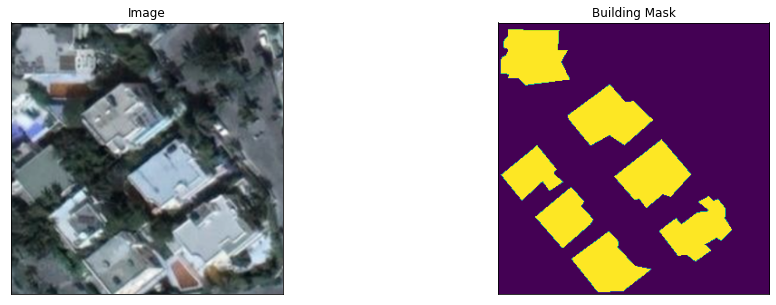

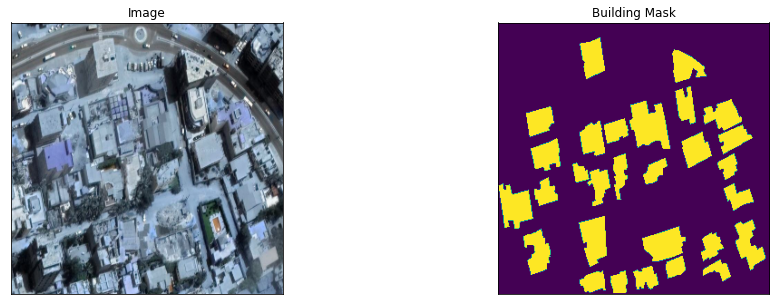

In [309]:
for i in range(2):
    image, mask = exampleValidData[i]
    visualize(
    image=image, 
    building_mask=mask.squeeze(),)